In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
dir_name = './HyperparameterResults/'
listFile = os.listdir(dir_name)
listFile

['base_dropout0.1.csv',
 'base_dropout0.2.csv',
 'base_dropout0.3.csv',
 'base_dropout0.5.csv',
 'base_dropout0.7.csv',
 'base_dropout0.9.csv',
 'prop_channel16.csv',
 'prop_channel3.csv',
 'prop_channel32.csv',
 'prop_channel6.csv',
 'prop_channel64.csv',
 'prop_channel8.csv',
 'prop_dropout0.1.csv',
 'prop_dropout0.2.csv',
 'prop_dropout0.3.csv',
 'prop_dropout0.5.csv',
 'prop_dropout0.7.csv',
 'prop_dropout0.9.csv']

In [3]:
result_dict = { 
    'model': [],
    'probability': [],
    'epoch': [],
    'training_loss': [],
    'training_acc': [],
    'validation_loss': [],
    'validation_acc': []
}

In [4]:
for i in listFile:
    if 'dropout' in i:
        df = pd.read_csv(dir_name + i)
        for j in range(10):
            result_dict['model'].append(i[:4])
            result_dict['probability'].append(i[-7:-4])
            result_dict['epoch'].append(df['epoch'].iloc[j])
            result_dict['training_loss'].append(df['loss'].iloc[j])
            result_dict['training_acc'].append(df['accuracy'].iloc[j])
            result_dict['validation_loss'].append(df['val_loss'].iloc[j])
            result_dict['validation_acc'].append(df['val_accuracy'].iloc[j])

In [7]:
df_results = pd.DataFrame(result_dict)
df_results

,model,probability,epoch,training_loss,training_acc,validation_loss,validation_acc
0,base,0.1,0,0.015626,0.337984,0.014940,0.224008
1,base,0.1,1,0.015275,0.299354,0.014843,0.322946
2,base,0.1,2,0.015262,0.297005,0.014885,0.442435
3,base,0.1,3,0.015257,0.303195,0.014851,0.261266
4,base,0.1,4,0.015261,0.299244,0.014883,0.356618
...,...,...,...,...,...,...,...
115,prop,0.9,5,0.017378,0.753526,0.016909,0.941879
116,prop,0.9,6,0.017380,0.740104,0.016974,0.410308
117,prop,0.9,7,0.017410,0.761730,0.017015,0.834398
118,prop,0.9,8,0.017396,0.774171,0.016935,0.860797


In [9]:
model_name = df_results['model'].unique()
probabilities = df_results['probability'].unique()

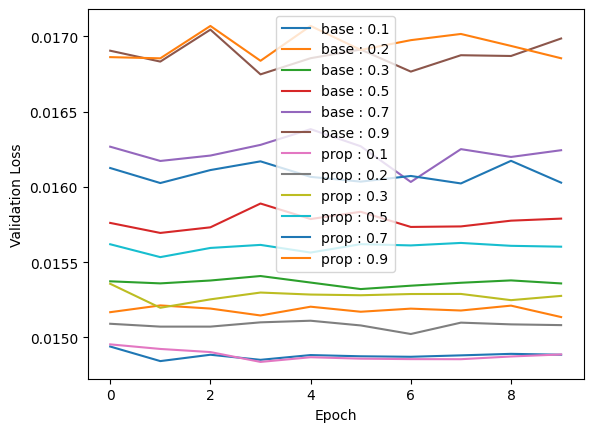

In [11]:
for i in model_name:
    for j in probabilities:
        df_temp = df_results[(df_results['model'] == i) & (df_results['probability'] == j)]
        plt.plot(df_temp['epoch'], df_temp['validation_loss'], label = i + ' : ' + j)
plt.xlabel('Epoch')
plt.ylabel('Validation Loss')
plt.legend()
plt.show()

In [20]:
for i in range(len(df_results)):
    df_results['Hyperparameters'][i] = df_results['model'].iloc[i] + ' : ' + df_results['probability'].iloc[i]

C:\Users\ASUS\AppData\Local\Temp\ipykernel_9028\1106722845.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_results['Hyperparameters'][i] = df_results['model'].iloc[i] + ' : ' + df_results['probability'].iloc[i]
C:\Users\ASUS\AppData\Local\Temp\ipykernel_9028\1106722845.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_results['Hyperparameters'][i] = df_results['model'].iloc[i] + ' : ' + df_results['probability'].iloc[i]
C:\Users\ASUS\AppData\Local\Temp\ipykernel_9028\1106722845.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentat

In [21]:
df_results

,model,probability,epoch,training_loss,training_acc,validation_loss,validation_acc,Hyperparameters
0,base,0.1,0,0.015626,0.337984,0.014940,0.224008,base : 0.1
1,base,0.1,1,0.015275,0.299354,0.014843,0.322946,base : 0.1
2,base,0.1,2,0.015262,0.297005,0.014885,0.442435,base : 0.1
3,base,0.1,3,0.015257,0.303195,0.014851,0.261266,base : 0.1
4,base,0.1,4,0.015261,0.299244,0.014883,0.356618,base : 0.1
...,...,...,...,...,...,...,...,...
115,prop,0.9,5,0.017378,0.753526,0.016909,0.941879,prop : 0.9
116,prop,0.9,6,0.017380,0.740104,0.016974,0.410308,prop : 0.9
117,prop,0.9,7,0.017410,0.761730,0.017015,0.834398,prop : 0.9
118,prop,0.9,8,0.017396,0.774171,0.016935,0.860797,prop : 0.9


<Axes: xlabel='epoch', ylabel='validation_loss'>

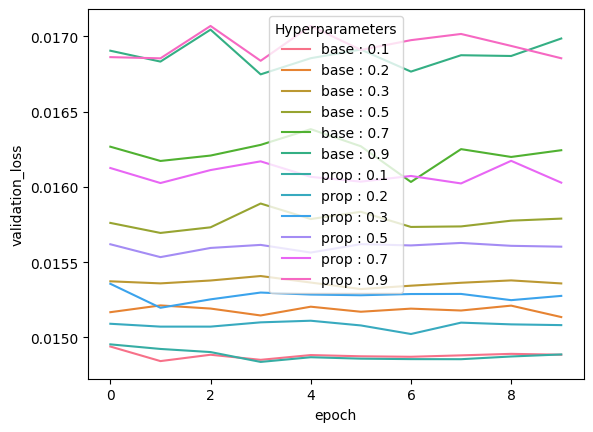

In [24]:
import seaborn as sns
sns.set_palette('')
sns.lineplot(data=df_results, x="epoch", y="validation_loss", hue="Hyperparameters")

<Axes: xlabel='epoch', ylabel='validation_acc'>

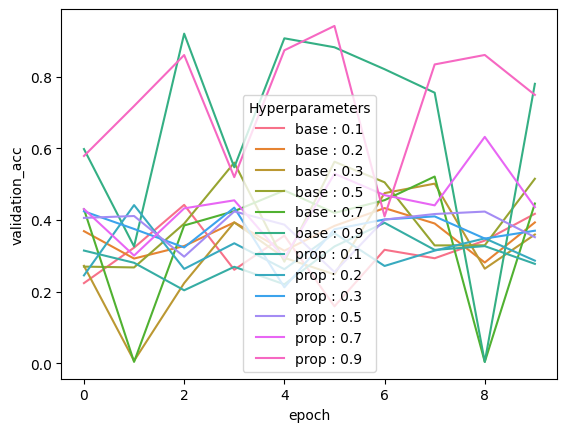

In [25]:
sns.lineplot(data=df_results, x="epoch", y="validation_acc", hue="Hyperparameters")


<Axes: xlabel='epoch', ylabel='training_loss'>

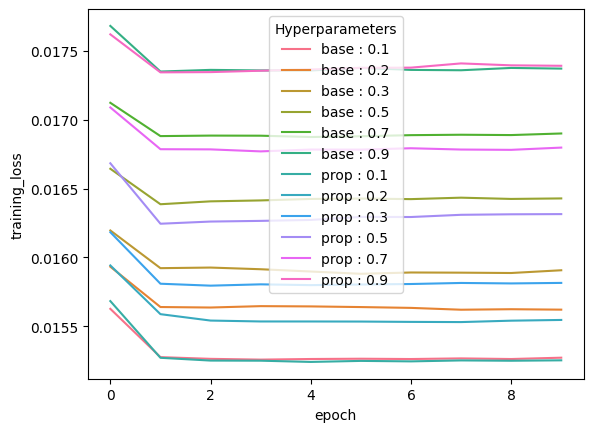

In [27]:

sns.lineplot(data=df_results, x="epoch", y="training_loss", hue="Hyperparameters")

<Axes: xlabel='epoch', ylabel='training_acc'>

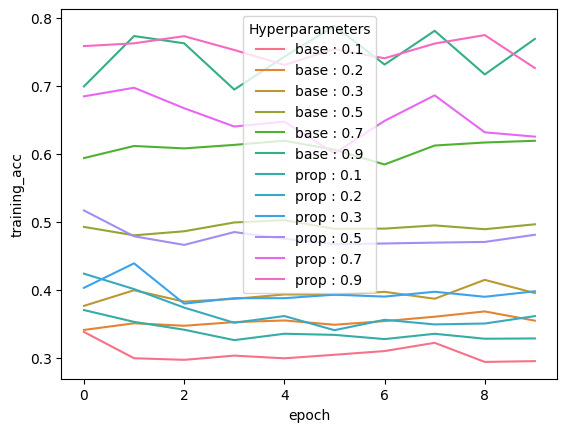

In [26]:
sns.lineplot(data=df_results, x="epoch", y="training_acc", hue="Hyperparameters")
